In [1]:
import nltk
import pandas as pd

In [3]:
messages = []
with open('smsspamcollection/SMSSpamCollection') as sms:
    for line in sms:
        messages.append(line)

In [2]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
messages['length'] = messages['message'].apply(lambda message: len(message))

In [7]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

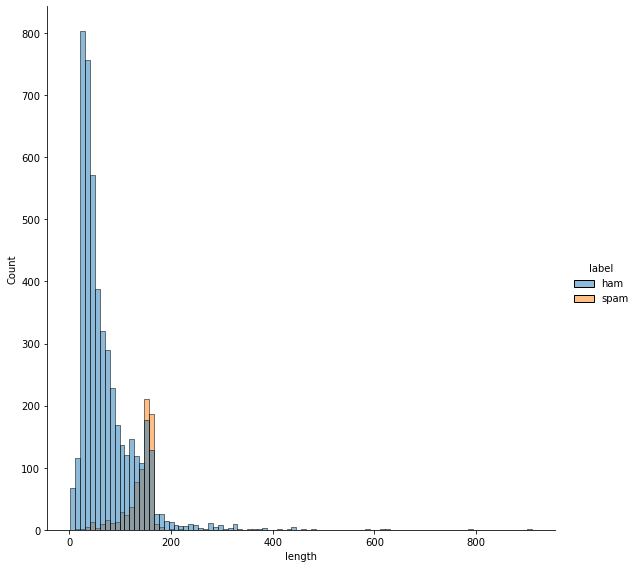

In [15]:
sns.displot(data=messages, x='length', hue='label', height=8)

In [23]:
messages[messages['length'] > 900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [26]:
import string
from nltk.corpus import stopwords

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def clean_mess(mess):
    no_punc = [c for c in mess if c not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    return [c for c in no_punc.split() if c.lower() not in stopwords.words('english')]

In [41]:
messages['message'].head(5).apply(clean_mess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
bow_transformer = CountVectorizer(analyzer=clean_mess).fit(messages['message'])

In [45]:
bow4 = bow_transformer.transform([messages['message'][3]])

In [49]:
bow_transformer.get_feature_names()[9554]

'say'

In [50]:
message_bow = bow_transformer.transform(messages['message'])

In [51]:
message_bow.shape

(5572, 11425)

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [54]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [55]:
message_tfidf = tfidf_transformer.transform(message_bow)

In [56]:
from sklearn.naive_bayes import MultinomialNB